# Explore Data

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a predictors relationship to the predictee is different between two groups. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [1]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Work/KiTH_Solutions/Research/Clinical Trial/study_metadata/all_performances.xlsx'

In [2]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/autonomous_cognitive_examination_rct/figures/covariates_and_acoe_socre/age_interact_status/adjustment'
sheet = 'study_results'

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


,Name,Measurement,Cohort,Educational_Status,Randomization_Group,Age,Sex,Ethnicity,Cognitive_Status,Cognitive_Status_Code,...,Subjective_Complaint,Attention_Complaint,Memory_Complaint,Fluency_Complaint,Language_Complaint,Visuospatial_Complaint,Impaired_on_ACE3,iADL_Impaired,ADL_Impaired,Adjusted_Total
0,NaN,patient_15,1,1.0,1.0,42,0.0,1.0,MCI,0,...,None,NaN,NaN,NaN,NaN,NaN,Yes,None,None,72.64
1,NaN,patient_17,1,1.0,1.0,35,1.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None,73.10
2,NaN,patient_19,1,1.0,1.0,71,0.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None,89.02
3,NaN,patient_25,1,1.0,1.0,53,0.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None,74.06
4,NaN,patient_26,1,2.0,1.0,49,0.0,0.0,MCI,0,...,Yes,NaN,NaN,NaN,Yes,NaN,Yes,None,None,83.18
5,NaN,patient_40,1,1.0,1.0,51,1.0,0.0,intact,1,...,Yes,NaN,Yes,NaN,Yes,NaN,No,None,None,96.62
6,NaN,patient_42,1,1.0,1.0,46,1.0,1.0,intact,1,...,Yes,NaN,Yes,NaN,Yes,NaN,No,None,None,92.52
7,NaN,patient_47,1,1.0,1.0,37,1.0,1.0,MCI,0,...,No,NaN,NaN,NaN,NaN,NaN,No,None,None,87.54
8,NaN,patient_108,2,1.0,1.0,35,0.0,0.0,intact,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.10
9,NaN,patient_109,2,3.0,1.0,41,0.0,0.0,MCI,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.42


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [4]:
data_df.columns

Index(['Name', 'Measurement', 'Cohort', 'Educational_Status',
       'Randomization_Group', 'Age', 'Sex', 'Ethnicity', 'Cognitive_Status',
       'Cognitive_Status_Code', 'Question_1', 'Question_3', 'Question_4',
       'Question_5', 'Question_6', 'Question_7', 'Question_8', 'Question_9',
       'Question_10', 'Question_11', 'Question_12', 'Question_13',
       'Question_14', 'Question_15', 'Question_16', 'Question_17',
       'Question_18', 'Question_19', 'Question_20', 'Total', 'Attention',
       'Memory', 'Fluency', 'Language', 'Visuospatial', 'POCA',
       'Convolutional_Neural_Network', 'Natural_Language_Processing',
       'Expert_Algorithm', 'Completed', 'ACE3_Question_2', 'ACE3_Question_3',
       'ACE3_Question_4', 'ACE3_Question_5', 'ACE3_Question_6',
       'ACE3_Question_7', 'ACE3_Question_8', 'ACE3_Question_9',
       'ACE3_Question_10', 'ACE3_Question_11', 'ACE3_Question_12',
       'ACE3_Question_13', 'ACE3_Question_14', 'ACE3_Question_15',
       'ACE3_Question_16', '

In [5]:
drop_list = ['Randomization_Group']

In [6]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,Name,Measurement,Cohort,Educational_Status,Randomization_Group,Age,Sex,Ethnicity,Cognitive_Status,Cognitive_Status_Code,...,Subjective_Complaint,Attention_Complaint,Memory_Complaint,Fluency_Complaint,Language_Complaint,Visuospatial_Complaint,Impaired_on_ACE3,iADL_Impaired,ADL_Impaired,Adjusted_Total
0,NaN,patient_15,1,1.0,1.0,42,0.0,1.0,MCI,0,...,None,NaN,NaN,NaN,NaN,NaN,Yes,None,None,72.64
1,NaN,patient_17,1,1.0,1.0,35,1.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None,73.10
2,NaN,patient_19,1,1.0,1.0,71,0.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None,89.02
3,NaN,patient_25,1,1.0,1.0,53,0.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None,74.06
4,NaN,patient_26,1,2.0,1.0,49,0.0,0.0,MCI,0,...,Yes,NaN,NaN,NaN,Yes,NaN,Yes,None,None,83.18
5,NaN,patient_40,1,1.0,1.0,51,1.0,0.0,intact,1,...,Yes,NaN,Yes,NaN,Yes,NaN,No,None,None,96.62
6,NaN,patient_42,1,1.0,1.0,46,1.0,1.0,intact,1,...,Yes,NaN,Yes,NaN,Yes,NaN,No,None,None,92.52
7,NaN,patient_47,1,1.0,1.0,37,1.0,1.0,MCI,0,...,No,NaN,NaN,NaN,NaN,NaN,No,None,None,87.54
8,NaN,patient_108,2,1.0,1.0,35,0.0,0.0,intact,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.10
9,NaN,patient_109,2,3.0,1.0,41,0.0,0.0,MCI,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.42


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [7]:
data_df.columns

Index(['Name', 'Measurement', 'Cohort', 'Educational_Status',
       'Randomization_Group', 'Age', 'Sex', 'Ethnicity', 'Cognitive_Status',
       'Cognitive_Status_Code', 'Question_1', 'Question_3', 'Question_4',
       'Question_5', 'Question_6', 'Question_7', 'Question_8', 'Question_9',
       'Question_10', 'Question_11', 'Question_12', 'Question_13',
       'Question_14', 'Question_15', 'Question_16', 'Question_17',
       'Question_18', 'Question_19', 'Question_20', 'Total', 'Attention',
       'Memory', 'Fluency', 'Language', 'Visuospatial', 'POCA',
       'Convolutional_Neural_Network', 'Natural_Language_Processing',
       'Expert_Algorithm', 'Completed', 'ACE3_Question_2', 'ACE3_Question_3',
       'ACE3_Question_4', 'ACE3_Question_5', 'ACE3_Question_6',
       'ACE3_Question_7', 'ACE3_Question_8', 'ACE3_Question_9',
       'ACE3_Question_10', 'ACE3_Question_11', 'ACE3_Question_12',
       'ACE3_Question_13', 'ACE3_Question_14', 'ACE3_Question_15',
       'ACE3_Question_16', '

Set the parameters for dropping rows

In [ ]:
column = 'City'  # The column you'd like to evaluate
condition = 'not'  # The condition to check ('equal', 'above', 'below')
value = "Wurzburg"  # The value to compare against

In [ ]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

# 1.5 - Descriptive Stats

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)  # None means unlimited
data_df.describe()

,Name,Cohort,Educational_Status,Randomization_Group,Age,Sex,Ethnicity,Cognitive_Status_Code,Question_1,Question_3,Question_4,Question_5,Question_6,Question_7,Question_8,Question_9,Question_10,Question_11,Question_12,Question_13,Question_14,Question_15,Question_16,Question_17,Question_18,Question_19,Question_20,Total,Attention,Memory,Fluency,Language,Visuospatial,POCA,Convolutional_Neural_Network,Natural_Language_Processing,Expert_Algorithm,Completed,ACE3_Question_2,ACE3_Question_3,ACE3_Question_4,ACE3_Question_5,ACE3_Question_6,ACE3_Question_7,ACE3_Question_8,ACE3_Question_9,ACE3_Question_10,ACE3_Question_11,ACE3_Question_12,ACE3_Question_13,ACE3_Question_14,ACE3_Question_15,ACE3_Question_16,ACE3_Question_17,ACE3_Question_18,ACE3_Question_19,ACE3_Question_20,ACE_Total,ACE_Attention,ACE_Memory,ACE_Fluency,ACE_Language,ACE_Visuospatial,Paper_PoCA,Convolutional_Neural_Network_Equivalent,Natural_Language_Processing_Equivalent,Expert_Algorithm_Equivalent,Fluency_Complaint,Visuospatial_Complaint,Adjusted_Total
count,0.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,0.0,0.0,35.000000
mean,NaN,2.142857,1.171429,1.457143,45.342857,0.485714,0.485714,0.571429,9.514286,2.914286,3.971429,2.600000,9.657143,5.628571,2.685714,2.428571,1.571429,1.714286,1.771429,10.685714,3.828571,0.457143,6.657143,3.685714,3.685714,4.485714,4.400000,82.342857,16.400000,19.800000,9.657143,22.457143,14.028571,38.771429,6.657143,47.285714,28.400000,1.0,9.685714,2.971429,4.228571,2.714286,11.228571,5.971429,3.028571,2.885714,1.857143,1.80000,1.885714,11.142857,3.600000,0.60000,7.028571,3.800000,3.800000,4.342857,4.542857,87.114286,16.885714,20.600000,11.228571,23.771429,14.628571,41.685714,7.028571,50.257143,29.828571,NaN,NaN,85.486857
std,NaN,1.191708,0.513678,0.505433,12.833648,0.507093,0.507093,0.502096,0.853072,0.284029,1.671310,0.774597,3.864947,1.800093,1.131668,0.777844,0.698137,0.518563,0.490241,2.373523,0.568057,0.505433,1.027357,0.676123,0.795998,2.405526,1.005865,12.877118,2.075062,5.345696,3.864947,3.720712,1.740279,8.997012,1.027357,9.011664,4.473451,0.0,0.900047,0.169031,1.238731,0.621735,2.544726,1.316987,0.890661,0.322803,0.355036,0.40584,0.322803,1.768064,0.735647,0.49705,1.524037,0.584103,0.719477,2.588923,0.780002,9.667323,1.658692,4.564569,2.544726,2.971291,2.101620,7.267055,1.524037,6.468670,2.833473,NaN,NaN,12.300534
min,NaN,1.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,54.000000,9.000000,8.000000,0.000000,7.000000,7.000000,20.000000,4.000000,26.000000,13.000000,1.0,5.000000,2.000000,0.000000,1.000000,5.000000,3.000000,0.000000,2.000000,1.000000,1.00000,1.000000,3.000000,1.000000,0.00000,1.000000,1.000000,0.000000,0.000000,2.000000,58.000000,11.000000,10.000000,5.000000,12.000000,7.000000,20.000000,1.000000,36.000000,21.000000,NaN,NaN,57.980000
25%,NaN,1.000000,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,9.000000,3.000000,3.500000,2.500000,6.500000,4.500000,2.000000,2.000000,1.000000,1.500000,2.000000,10.000000,4.000000,0.000000,6.000000,4.000000,4.000000,2.000000,4.000000,73.500000,16.000000,16.000000,6.500000,21.000000,13.000000,32.000000,6.000000,40.500000,26.000000,1.0,10.000000,3.000000,4.000000,2.500000,10.000000,5.000000,3.000000,3.000000,2.00

Visualize Descriptive Stats

In [6]:
data_df.columns

Index(['Name', 'Measurement', 'Cohort', 'Educational_Status',
       'Randomization_Group', 'Age', 'Sex', 'Ethnicity', 'Cognitive_Status',
       'Cognitive_Status_Code', 'Question_1', 'Question_3', 'Question_4',
       'Question_5', 'Question_6', 'Question_7', 'Question_8', 'Question_9',
       'Question_10', 'Question_11', 'Question_12', 'Question_13',
       'Question_14', 'Question_15', 'Question_16', 'Question_17',
       'Question_18', 'Question_19', 'Question_20', 'Total', 'Attention',
       'Memory', 'Fluency', 'Language', 'Visuospatial', 'POCA',
       'Convolutional_Neural_Network', 'Natural_Language_Processing',
       'Expert_Algorithm', 'Completed', 'ACE3_Question_2', 'ACE3_Question_3',
       'ACE3_Question_4', 'ACE3_Question_5', 'ACE3_Question_6',
       'ACE3_Question_7', 'ACE3_Question_8', 'ACE3_Question_9',
       'ACE3_Question_10', 'ACE3_Question_11', 'ACE3_Question_12',
       'ACE3_Question_13', 'ACE3_Question_14', 'ACE3_Question_15',
       'ACE3_Question_16', '

In [15]:
import pandas as pd
df = pd.read_excel(input_csv_path, sheet)
data_df = df

select cols to plot

In [ ]:
data_df = data_df.loc[:, ['Cohort', 'Educational Status',
       'Randomization Group', 'Age', 'Sex', 'Ethnicity', 'Cognitive Status', 'Total']]

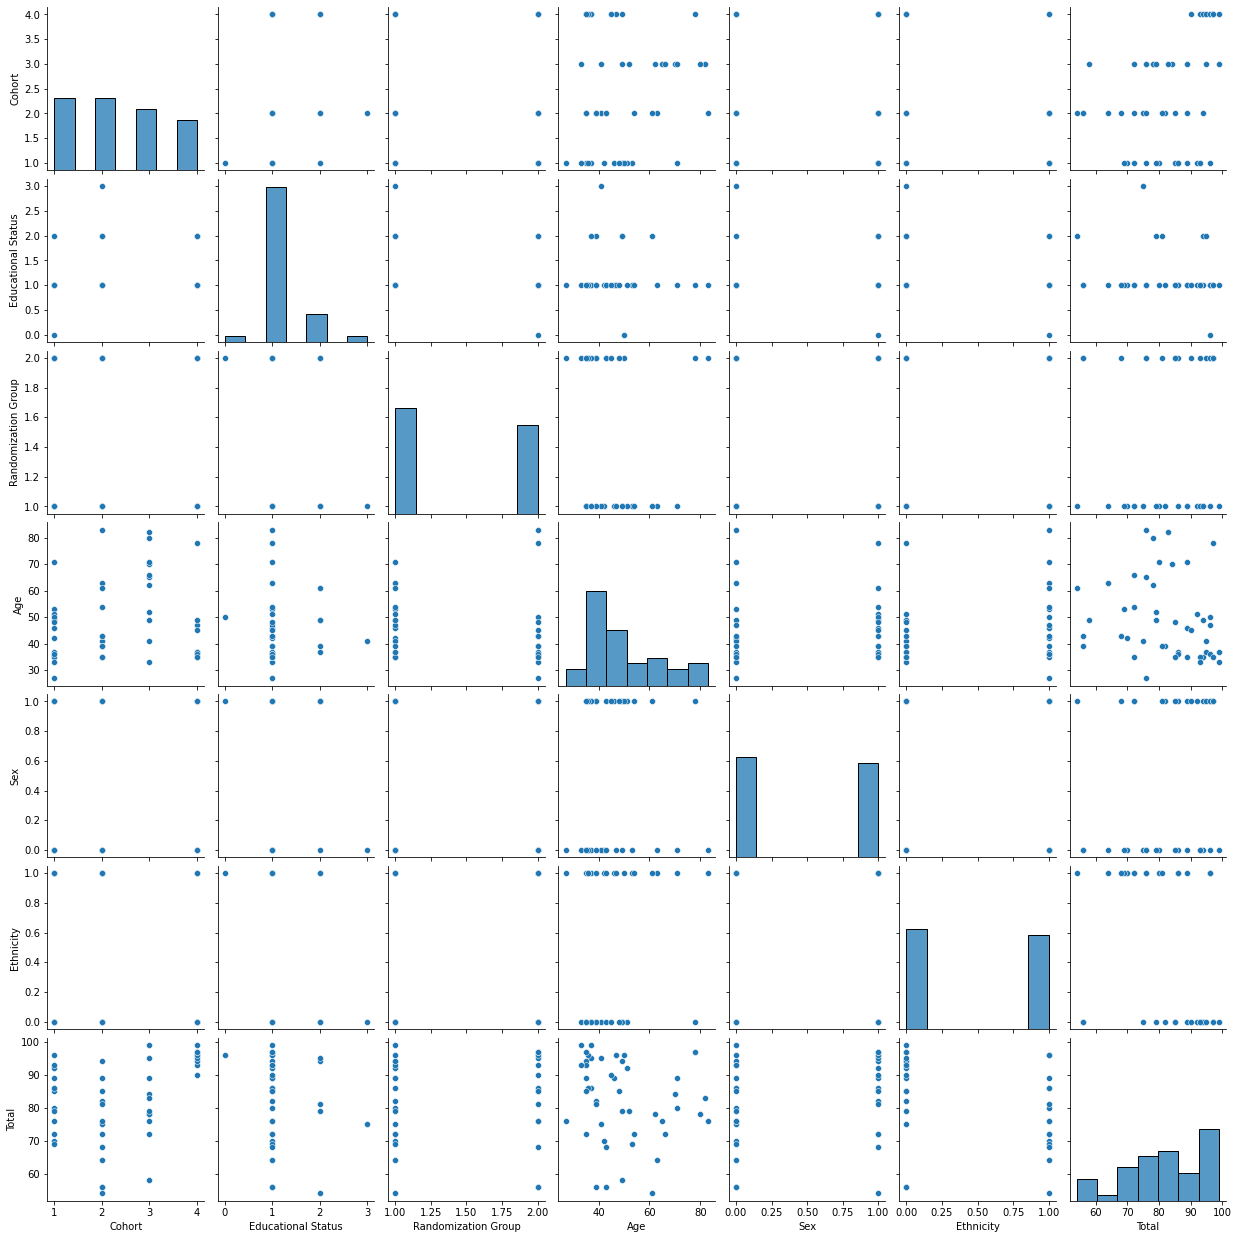

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pairplot
pairplot = sns.pairplot(data_df)

# Save the plot to a specific directory
plt.savefig('/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/autonomous_cognitive_examination_rct/figures/covariate_relationships/pairplot.svg')  # Change this path to your desired folder

# Show the plot if needed (this line can be omitted if only saving is required)
plt.show()

# 02 - Visualize 3D Data

In [ ]:
import plotly.express as px

def generate_scatterplot(dataframe, data_dict, correlation, palette, out_dir):
    """
    Generates a 3D scatter plot from the given DataFrame and saves it to the specified directory.

    Parameters:
    - dataframe: pandas DataFrame containing the data.
    - data_dict: Dictionary with one key-value pair, where the key is the dependent variable 
                 and the value is a list of independent variables (length should be 2 for 3D scatter).
    - x_label, y_label, z_label: Labels for the x, y, and z axes.
    - correlation: Whether to display correlation information on the plot (True/False).
    - palette: Color palette for the plot.
    - out_dir: Directory path where the plot image will be saved.
    """
    dependent_var = list(data_dict.keys())[0]
    independent_vars = data_dict[dependent_var]

    if len(independent_vars) != 2:
        raise ValueError("Independent variable list must contain exactly two elements for 3D scatter plot.")

    fig = px.scatter_3d(dataframe, x=independent_vars[0], y=independent_vars[1], z=dependent_var,
                        color=dependent_var, color_continuous_scale=palette)

    # Set the labels
    fig.update_layout(scene=dict(
        xaxis_title=independent_vars[0],
        yaxis_title=independent_vars[1],
        zaxis_title=dependent_var
    ))

    # Optionally, add correlation info as annotation
    if correlation:
        # Compute and display correlation (requires additional implementation)
        pass

    # Save the plot to the output directory
    fig.write_image(f"{out_dir}/3d_scatter_plot.png")

    return fig

In [ ]:
data_df.columns

In [ ]:
data_dict = {'ventricleVisualCH': ['SubcortexSurface', 'SubcortexCSF']}

In [ ]:
# Example usage
plot = generate_scatterplot(dataframe=data_df, 
                            data_dict=data_dict,
                            correlation=True,
                            palette='Reds',
                            out_dir=out_dir)
plot

# 03 - Visualize Distribution

In [ ]:
data_df.columns

In [ ]:
scatter_variable = 'Z_Scored_Cognitive_Baseline'
categorical_variable = 'Disease'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
import os

def create_custom_stripplot(data, x_variable, y_variable, hue_change_value, out_dir=None):
    sns.set(style="white")

    # Get/set params for the color mapping
    vcenter = hue_change_value
    vmin, vmax = data[y_variable].min(), data[y_variable].max()
    normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
    colormap = cm.coolwarm

    # Create a scatter plot with custom color mapping
    plt.figure(figsize=(6, 6))
    ax = sns.scatterplot(
        x=x_variable,
        y=y_variable,
        data=data,
        c=data[y_variable],
        norm=normalize,
        cmap=colormap,
    )
    ax.axhline(y=vcenter, color='gray', linestyle='--')

    # Tweak the points to mimic `sns.stripplot`
    pts = ax.collections[0]
    pts.set_offsets(pts.get_offsets() + np.c_[np.random.uniform(-0.1, 0.1, len(data)), np.zeros(len(data))])
    ax.margins(x=0.15)

    scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappable.set_array(data[y_variable])

    # Add a colorbar
    cbar = plt.colorbar(scalarmappable, ax=ax)
    cbar.set_label(y_variable)

    plt.title(f'Strip Plot of {y_variable} by {x_variable} with Hue Change at {hue_change_value}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    sns.despine()
    
    # Save the figure if out_dir is provided
    if out_dir:
        os.makedirs(out_dir, exist_ok=True)
        plt.savefig(f"{out_dir}/strip_plot.png", bbox_inches='tight')
        plt.savefig(f"{out_dir}/strip_plot.svg", bbox_inches='tight')
        print(f'Saved to {out_dir}/strip_plot.svg')
    else:
        plt.show()

In [ ]:
# Example usage:
create_custom_stripplot(data_df, categorical_variable, scatter_variable, 0, out_dir=out_dir)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

def create_distribution_violin_plot(data, x_variable, y_variable, hue_change_value, out_dir=None):
    sns.set(style="white")
    plt.figure(figsize=(5, 6))

    # Create the violin plot with specified parameters
    sns.violinplot(data=data, x=x_variable, y=y_variable, hue=x_variable, width=.9, cut=2, split=False, inner='box', palette='Greys', alpha=0.1)

    # Create the swarm plot on top of the violin plot
    sns.swarmplot(data=data, x=x_variable, y=y_variable, hue=x_variable, palette=['red', 'blue'], alpha=0.7)

    plt.title(f'Strip Plot with Hemi Violin of {y_variable} by {x_variable} with Hue Change at {hue_change_value}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the figure if out_dir is provided
    if out_dir:
        os.makedirs(out_dir, exist_ok=True)
        plt.savefig(f"{out_dir}/distribution_violin.png", bbox_inches='tight')
        plt.savefig(f"{out_dir}/distribution_violin.svg", bbox_inches='tight')
        print(f'Saved to {out_dir}/distribution_violin.svg')
    else:
        plt.show()



In [ ]:
# Example usage:
create_distribution_violin_plot(data_df, categorical_variable, scatter_variable, None, out_dir=out_dir)

# Create Pie Chart

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def create_pie_chart(series, out_dir=None):
    """
    Takes a pandas Series and generates a pie chart using the Tab10 colormap.
    
    Parameters:
    series (pandas.Series): The input series where the index will be used as labels and the values as sizes.
    out_dir (str, optional): Directory to save the pie chart images. Saves in both PNG and SVG formats if provided.
    """
    # Check if the input is a pandas Series
    if not isinstance(series, pd.Series):
        raise ValueError("The input must be a pandas Series.")
    
    # Set the Tab10 colormap
    cmap = plt.get_cmap("tab10")
    colors = cmap(range(len(series)))
    
    # Generate the pie chart
    fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size for better visibility
    wedges, texts, autotexts = ax.pie(series, labels=series.index, autopct='%1.1f%%', startangle=140, colors=colors)
    
    # Add legend, which can be edited later by accessing the `legend` object
    ax.legend(wedges, series.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.setp(autotexts, size=8, weight="bold")
    ax.set_title("Pie Chart")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # Save figures if out_dir is provided
    if out_dir is not None:
        if not os.path.exists(out_dir):
            os.makedirs(out_dir)
        plt.savefig(os.path.join(out_dir, 'pie.png'))
        plt.savefig(os.path.join(out_dir, 'pie.svg'))

    plt.show()

In [ ]:
create_pie_chart(data_df['Percent'], out_dir=out_dir)